# IS318 - Machine Learning

## TP1 - Linear regression

The goal of this TP is to experiment with linear regression and polynomial linear regression.

First, we will work **without** the use of external libraries (such as `scikit-learn`).

Completed by Mohamed Kherraz and Thomas Trenty. 

In [35]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset

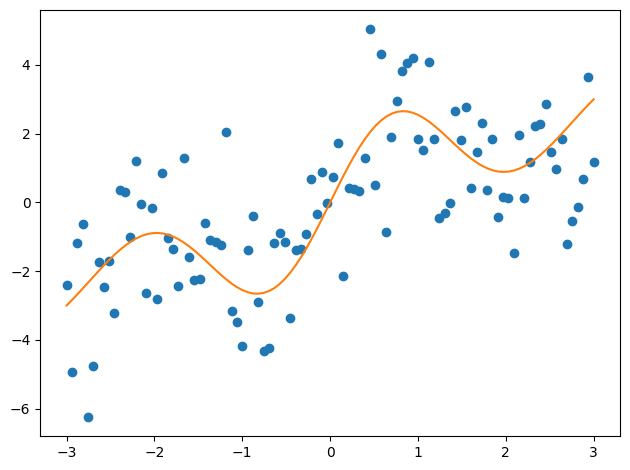

In [36]:
# Let us generate data points from a relatively complicated function
N = 100
alpha, sigma = 2., 3.
X = np.linspace(-3, 3, num=N)
y = X + (alpha * np.sin((2. * np.pi * X) / sigma) * np.exp(-(X ** 2) / (sigma ** 2)))
# Add some random noise
rng = np.random.default_rng(42)
y_noisy = y + rng.standard_normal(N) * 2.
# Show the data points
plt.plot(X, y_noisy, 'o')
plt.plot(X, y)
plt.tight_layout()

**(Question)** Shuffle and split the dataset into training (75%) and validation (25%) sets. Store the results into variables `X_train`, `y_train`, `X_valid`, `y_valid`.

*Hint:* you can use `rng.permutation` to generate a random permutation.

In [37]:
data = np.vstack((X, y))
# Get permuted indices
permuted_indices = rng.permutation(len(X))

# Apply the permutation to both X and y
X_permuted = X[permuted_indices]
y_permuted = y_noisy[permuted_indices]

train_ratio = 0.75
len_data = len(X)
train_size = int(len_data * train_ratio)
X_train = X_permuted[:train_size].flatten()
X_valid = X_permuted[train_size:].flatten()
y_train = y_permuted[:train_size].flatten()
y_valid = y_permuted[train_size:].flatten()

In [38]:
assert X_train.shape == (75,)
assert y_train.shape == (75,)
assert X_valid.shape == (25,)
assert y_valid.shape == (25,)
assert np.any(X_valid != X[75:]) # points should be shuffled

### 2. Linear regression in 1D

Recall the 1D linear regression model, where we search for parameters $w_0, w_1$ that will satisfy $y_i = w_0 + w_1 x_i$ (for all $i$ in the training set).

To simplify calculations, we usually set $\textbf{w} = [w_0, w_1]^T$ and $\textbf{x}_i = [1, x_i]^T$.

Then we have $y_i = \textbf{w}^T \textbf{x}_i $.

**(Question)** Add a column with ones to the points in `X_train` and `X_valid`. Store the result in new variables `X_train_ones` and `X_valid_ones`:

In [39]:
# Adding a column of ones so that we can learn the bias directly in the weights
X_train_ones = np.vstack((np.ones(len(X_train)), X_train)).T
X_valid_ones = np.vstack((np.ones(len(X_valid)), X_valid)).T

**(Question)** Use normal equations to find the parameters that minimize the mean squared error on the training set.

In [40]:
# From the normal equations, we have that the solution is given by w = (X^T @ X)^(-1) @ X^T @ y
prod_inverse = np.linalg.inv(np.dot(X_train_ones.T, X_train_ones))
w = prod_inverse @ X_train_ones.T @ y_train

print(f"Solution found: w0 = {w[0]}, w1 = {w[1]}")

Solution found: w0 = -0.03550165744448797, w1 = 0.686803829226949


In [41]:
assert w.shape == (2,)

**(Question)** Is it always possible to apply this solution? Can you think of example situations where it might not work?

This solution is only applicable in the case of linear regression and only if the matrix $ X^TX $ is invertible, which typically means that the features are not perfectly collinear (i.e., no feature is a perfect linear combination of the others).

However, there is another way to avoid this problem by using an approximation of $ X^TX $, called the pseudoinverse, written as $ X^+ $. The pseudoinverse is calculated using the Singular Value Decomposition (SVD) factorization of the matrix $ X $ into $ U \Sigma V^T $. The matrix $ X^+ $ is computed based on the formula $ X^+ = V \Sigma^+ U^T $, where $ \Sigma^+ $ is obtained by taking the reciprocal of the non-zero values in $ \Sigma $ and setting all values below a certain threshold to zero.

**(Question)** Plot the fitted line on top of the data points. Explain the result. (complete the code and comment in the cell below)

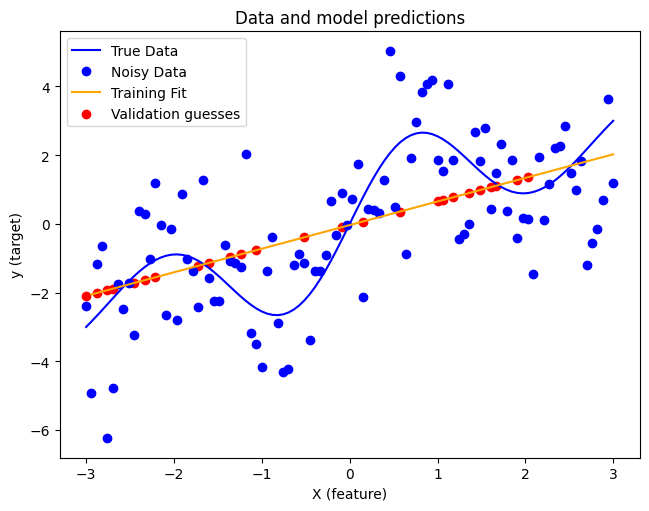

Variance - Training: 	3.2545
Variance - Validation: 	3.2286
Mean Squared Error (MSE) - Training: 	3.2545
Mean Squared Error (MSE) - Validation: 	3.2963


In [42]:
y_train_res = np.dot(X_train_ones, w)
y_valid_res = np.dot(X_valid_ones, w)

def plot_data_and_prediction(X_train, y_train_res, X_valid, y_valid_res):
    # Reorder X_train and X_valid for ploting
    X_train_indices = np.argsort(X_train)
    X_train_plot = X_train[X_train_indices]
    y_train_res_plot = y_train_res[X_train_indices]

    # Show the data points
    plt.plot(X, y, label='True Data', color='blue')
    plt.plot(X, y_noisy, 'o', label='Noisy Data', color='blue')
    plt.plot(X_train_plot, y_train_res_plot, label='Training Fit', color='orange')
    plt.scatter(X_valid, y_valid_res, label='Validation guesses', color='red')
    plt.tight_layout()
    plt.xlabel('X (feature)')
    plt.ylabel('y (target)')
    plt.title('Data and model predictions')
    plt.legend()
    plt.show()

plot_data_and_prediction(X_train, y_train_res, X_valid, y_valid_res)

var_train = np.var(y_train - y_train_res)
var_valid = np.var(y_valid - y_valid_res)
degree1_mse_train = np.mean((y_train - y_train_res) ** 2)
degree1_mse_valid = np.mean((y_valid - y_valid_res) ** 2)

print(f"Variance - Training: \t{var_train:.4f}")
print(f"Variance - Validation: \t{var_valid:.4f}")
print(f"Mean Squared Error (MSE) - Training: \t{degree1_mse_train:.4f}")
print(f"Mean Squared Error (MSE) - Validation: \t{degree1_mse_valid:.4f}")

The fitted model is a straight line, which is expected since a first-degree polynomial (with only two parameters) is used to model the problem. The quality of the fitted line, based on the average variance and mean squared error between between true $y$ values and predicted $y$ values, gives a value of 3.25 on the training set. It is clear that the predicted line follows the general trend of the data. Overall, it appears to represent the data as well as possible, given the capabilities of the problem.

The MSE values for the training and validation sets are very close to each other, and visually, it can be observed that the predicted line does not fit the data in the training set any better than in the validation set, indicating that there is no overfitting at this point; however, there is clear underfitting, as the line fails to capture the complexity of the dataset. This underfitting is evident because the model is using a first-degree polynomial (a straight line) to fit data that follows a complex pattern, and as a result, the simplicity of the model does not adequately represent the complexity of the data.

**(Question)** Plot the loss function landscape. What can you conclude from this visualization? (complete the code and comment in the cell below)

*Hint: the loss landscape can be represented by a 2D map (for example of size 100x100) where in each coordinate $(w_0, w_1)$ the value is mean squared error for these parameters. You can use `plt.contourf` to visualize the result.*

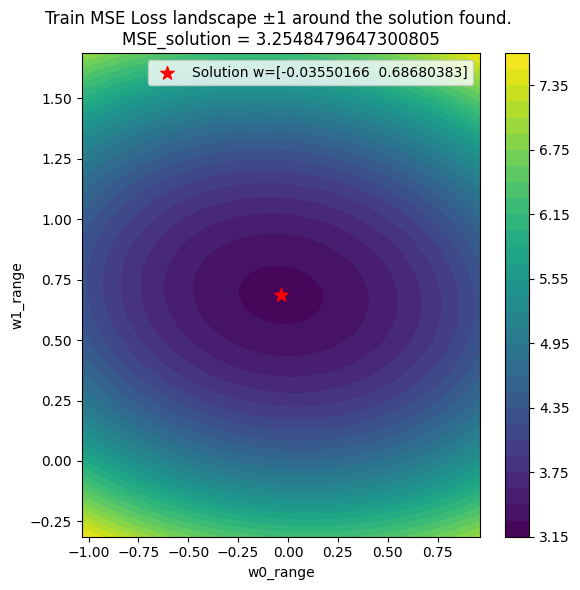

In [43]:
w0_min = w[0] - 1
w0_max = w[0] + 1
w1_min = w[1] - 1
w1_max = w[1] + 1

nb_lines = 100

w0_range = np.linspace(w0_min, w0_max, nb_lines)
w1_range = np.linspace(w1_min, w1_max, nb_lines)
W0, W1 = np.meshgrid(w0_range, w1_range)

combinations = np.column_stack((W0.flatten(), W1.flatten())).T

y_train_res = np.dot(X_train_ones, combinations)
y_valid_res = np.dot(X_valid_ones, combinations)

y_train_repeat = np.repeat(y_train, y_train_res.shape[1])
y_train_repeat = y_train_repeat.reshape(train_size, y_train_res.shape[1]) 

mse_train = np.mean((y_train_repeat - y_train_res) ** 2, axis = 0)
mse_train = mse_train.reshape(nb_lines, nb_lines)

# Plot the contourf
plt.figure(figsize=(6, 6))
plt.contourf(w0_range, w1_range, mse_train, 30, cmap='viridis')  # 30 contours, using a color map
plt.colorbar()  # Add a color bar to show the scale
plt.scatter(w[0], w[1], color='red', marker='*', s=100, label=f'Solution w={w}')  # Scatter point at the solution
plt.title(f"Train MSE Loss landscape ±1 around the solution found. \nMSE_solution = {mse_train.min()}")
plt.xlabel("w0_range")
plt.ylabel("w1_range")
plt.legend()
plt.tight_layout()
plt.show()

**3D Visualization of the Loss Landscape ±3 Around the Solution**


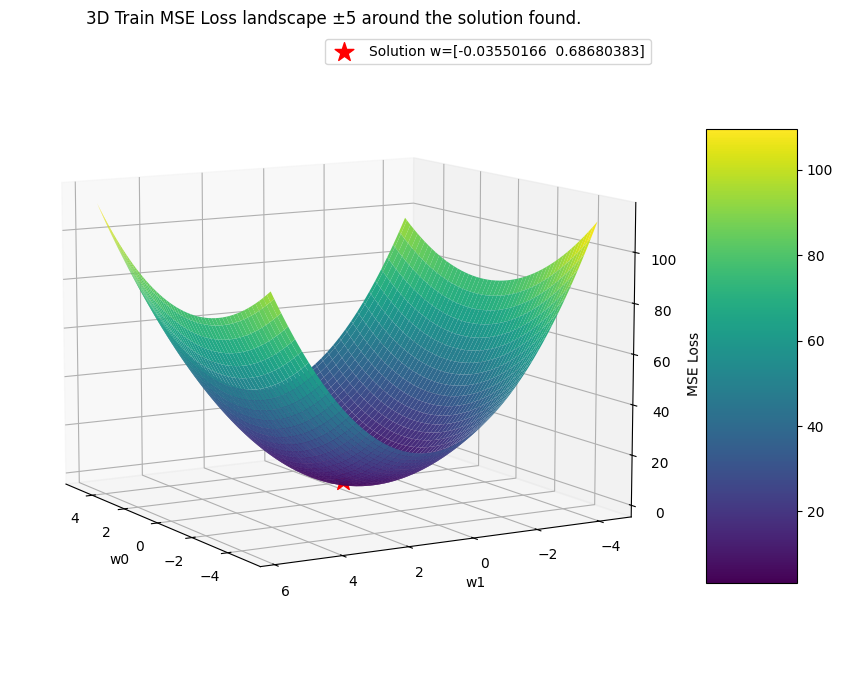

In [44]:
around_value = 5
w0_min = w[0] - around_value
w0_max = w[0] + around_value
w1_min = w[1] - around_value
w1_max = w[1] + around_value

nb_lines = 100
w0_range = np.linspace(w0_min, w0_max, nb_lines)
w1_range = np.linspace(w1_min, w1_max, nb_lines)
W0, W1 = np.meshgrid(w0_range, w1_range)

combinations = np.column_stack((W0.flatten(), W1.flatten())).T

y_train_res = np.dot(X_train_ones, combinations)
y_valid_res = np.dot(X_valid_ones, combinations)

y_train_repeat = np.repeat(y_train, y_train_res.shape[1])
y_train_repeat = y_train_repeat.reshape(train_size, y_train_res.shape[1]) 

mse_train = np.mean((y_train_repeat - y_train_res) ** 2, axis = 0)
mse_train = mse_train.reshape(nb_lines, nb_lines)

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
_w0_range, _w1_range = np.meshgrid(w0_range, w1_range)
surf = ax.plot_surface(_w0_range, _w1_range, mse_train, cmap='viridis', edgecolor='none')
ax.view_init(elev=10, azim=150) # Change view side and angle

# Plot the global minimum weights
ax.scatter(w[0], w[1], degree1_mse_valid, color='red', marker='*', s=200, label=f'Solution w={w}')

# Add color bar and labels
fig.colorbar(surf, ax=ax, shrink=0.7, aspect=5)
ax.set_title(f"3D Train MSE Loss landscape ±{around_value} around the solution found.")
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('MSE Loss')
ax.legend()
plt.tight_layout()
plt.show()

The solution found and the calculated landscape seem to make sense, with the solution appearing to be at the minimum of the loss function. The coefficient `w1`, which represents the slope, seems to have a greater impact on the model's ability to correctly fit the data (based on the MSE) than the coefficient `w0` which represents the y-intercept. The loss landscape seems to be convex even when looking ±5 around the solution coefficients, meaning the solution we got is the only and global minimum of the MSE loss.

### 3. Polynomial linear regression

We move on the polynomial linear regression model with degree $D$, where the relationship between $y_i$ and $x_i$ is
$ y_i = w_0 + w_1x_i + w_2x_i^2 + \ldots + w_D x_i^D $

With $\textbf{w} = [w_0, \ldots, w_D]^T$ and $\textbf{x}_i = [1, x_i, x_i^2, \ldots, x_i^D]^T$, we have $y_i = \textbf{w}^T \textbf{x}_i $.

$D \geq 1$ is an hyperparameter of the model.

**(Question)** Complete the following `PolynomialRegression` class

In [45]:
class PolynomialRegression():
    def __init__(self, D=1):
        assert D >=1
        self.D = D
        self.w = None
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        self.w = np.dot(
                    np.dot(
                        np.linalg.inv(np.dot(X.T, X)), 
                        X.T),
                    y)
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        return np.dot(X, self.w)

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1

        # Create the augmented matrix with N rows and D+1 columns
        N = X.shape[0]
        
        # Initialize an empty matrix with N rows and D+1 columns
        X_poly = np.ones((N, self.D+1))  # The first column is all ones (bias term)
    
        # Fill in the rest of the columns with powers of X
        for d in range(1, self.D+1):
            X_poly[:, d] = X**d
    
        return X_poly

**(Question)** Implement the mean squared error function to measure the quality of predictions.

In [46]:
def mean_squared_error(y_true, y_pred):
    '''Return the mean squared error between `y_true` and `y_pred`.'''
    assert y_true.shape == y_pred.shape
    return np.mean((y_true - y_pred) ** 2)

In [47]:
a, b = np.random.randn(10), np.random.randn(10)
assert mean_squared_error(a, b) >= 0.
assert mean_squared_error(a, a) == 0.

**(Question)** Apply the polynomial regression model with $D=5$. Compute and print the mean squared error for the training and validation sets.

In [48]:
D = 5
polynomial_regression = PolynomialRegression(D)

# Adding a column of ones so that we can learn the bias directly in the weights
X_train_poly = polynomial_regression.make_poly(X_train)
X_valid_poly = polynomial_regression.make_poly(X_valid)

# Fit and evaluate the model
polynomial_regression.fit(X_train_poly, y_train)

y_train_res = polynomial_regression.predict(X_train_poly)
y_valid_res = polynomial_regression.predict(X_valid_poly)

degree5_mse_train = mean_squared_error(y_train, y_train_res)
degree5_mse_valid = mean_squared_error(y_valid, y_valid_res)

print(f"{'Model':<35} {'Set':<10} {'MSE':<10}")
print(f"{'-'*35:<35} {'-'*10:<10} {'-'*10:<10}")
print(f"{'Degree 1 Polynomial Regression':<35} {'Training':<10} {degree1_mse_train:<10.4f}")
print(f"{'Degree 1 Polynomial Regression':<35} {'Validation':<10} {degree1_mse_valid:<10.4f}")
print(f"{'Degree 5 Polynomial Regression':<35} {'Training':<10} {degree5_mse_train:<10.4f}")
print(f"{'Degree 5 Polynomial Regression':<35} {'Validation':<10} {degree5_mse_valid:<10.4f}")

Model                               Set        MSE       
----------------------------------- ---------- ----------
Degree 1 Polynomial Regression      Training   3.2545    
Degree 1 Polynomial Regression      Validation 3.2963    
Degree 5 Polynomial Regression      Training   2.2356    
Degree 5 Polynomial Regression      Validation 3.3215    


**(Question)** Plot the fitted polynomial curve on top of the data points. Explain the result. (complete the code and comment in the cell below)

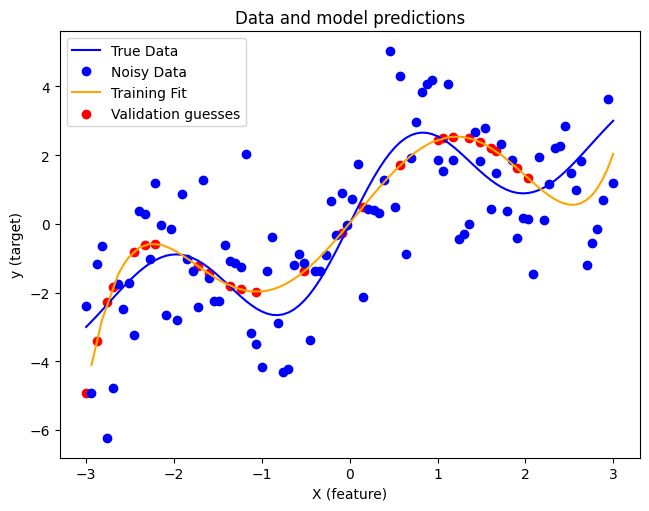

In [49]:
plot_data_and_prediction(X_train, y_train_res, X_valid, y_valid_res)

The curve fit is closer to the true original function this time; however, the data is quite noisy, and the degree of the polynomial may not be high enough, so the fit is still not perfectly aligned with the original (ideally perfect) function.

We can observe that the MSE scores for the training set (2.24) and the validation set (3.32) are noticeably different, indicating a tendency for the model to overfit. This behavior could potentially be mitigated by increasing the amount of data in the training set.

**(Question)** Using the validation set, implement a simple model selection strategy to optimize hyperparameter $D$ and print this value. For this question, you should limit the search to $D \in [1, 15]$.
To visualize potential underfitting and overfitting effects, plot the evolution of the error on the training and the validation sets for the different values of $D$.

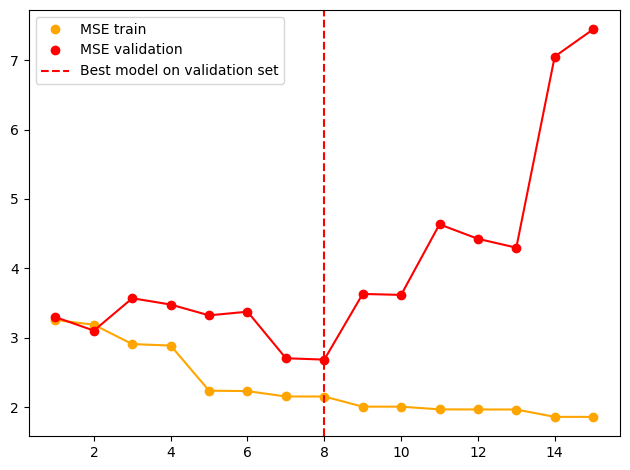

Best model on validation set: D = 8, MSE_validation = 2.6835
Second best model on validation set: D = 7, MSE_validation = 2.7033
MSE relative difference between the best and second best model: 1.97 %


In [50]:
def get_mse_for_degree(D, X_train, X_valid, y_train, y_valid):
    """
    Evaluate the MSE for a given degree of polynomial regression.
    """
    polynomial_regression = PolynomialRegression(D)

    X_train_poly = polynomial_regression.make_poly(X_train)
    X_valid_poly = polynomial_regression.make_poly(X_valid)
    polynomial_regression.fit(X_train_poly, y_train)

    y_train_res = polynomial_regression.predict(X_train_poly)
    y_valid_res = polynomial_regression.predict(X_valid_poly)

    mse_train = mean_squared_error(y_train, y_train_res)
    mse_valid = mean_squared_error(y_valid, y_valid_res)

    return mse_train, mse_valid

D = 16

D_values = np.array(range(1, D))
mse_train, mse_valid = [], []
for d in D_values:
    mse_train_new, mse_valid_new = get_mse_for_degree(d, X_train, X_valid, y_train, y_valid)
    mse_train.append(mse_train_new)
    mse_valid.append(mse_valid_new)

D_best = np.argmin(mse_valid)+1

# Plot the evolution of the MSE for the training and validation sets for different degrees of polynomial regression
plt.plot(D_values, mse_train, 'o', label='MSE train', color='orange')
plt.plot(D_values, mse_train, color='orange')
plt.plot(D_values, mse_valid, 'o', label='MSE validation', color='red')
plt.plot(D_values, mse_valid, color='red')
plt.axvline(D_best, color='red', linestyle='--', label='Best model on validation set')
plt.tight_layout()
plt.legend()
plt.show()

print(f"Best model on validation set: D = {D_best}, MSE_validation = {np.min(mse_valid):.4f}")
print(f"Second best model on validation set: D = {np.argsort(mse_valid)[1]+1}, MSE_validation = {np.sort(mse_valid)[1]:.4f}")
print(f"MSE relative difference between the best and second best model: {(np.sort(mse_valid)[1] - np.min(mse_valid))*100:.2f} %")

**(Question)** Plot the fitted polynomial curve of the best model on top of the data points. Comment the results.

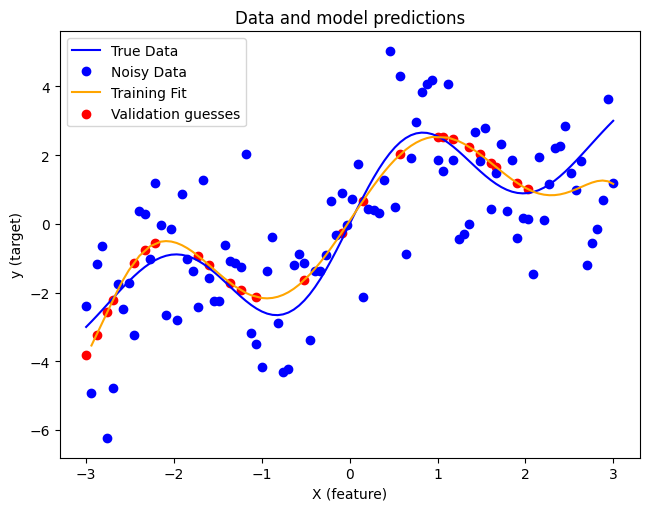

Model                               Set        MSE       
----------------------------------- ---------- ----------
Degree 1 Polynomial Regression      Training   3.2545    
Degree 1 Polynomial Regression      Validation 3.2963    
Degree 5 Polynomial Regression      Training   2.2356    
Degree 5 Polynomial Regression      Validation 3.3215    
Degree 8 Polynomial Regression      Training   2.1517    
Degree 8 Polynomial Regression      Validation 2.6835    


In [51]:
# Instead of saving the predictions of each models, we choose to retrain the best model instead here.

D = D_best

# Training and evaluating best model again
polynomial_regression = PolynomialRegression(D)

X_train_poly = polynomial_regression.make_poly(X_train)
X_valid_poly = polynomial_regression.make_poly(X_valid)

polynomial_regression.fit(X_train_poly, y_train)

y_train_res = polynomial_regression.predict(X_train_poly)
y_valid_res = polynomial_regression.predict(X_valid_poly)

plot_data_and_prediction(X_train, y_train_res, X_valid, y_valid_res)

degree_best_mse_train = mean_squared_error(y_train, y_train_res)
degree_best_mse_valid = mean_squared_error(y_valid, y_valid_res)

print(f"{'Model':<35} {'Set':<10} {'MSE':<10}")
print(f"{'-'*35:<35} {'-'*10:<10} {'-'*10:<10}")
print(f"{'Degree 1 Polynomial Regression':<35} {'Training':<10} {degree1_mse_train:<10.4f}")
print(f"{'Degree 1 Polynomial Regression':<35} {'Validation':<10} {degree1_mse_valid:<10.4f}")
print(f"{'Degree 5 Polynomial Regression':<35} {'Training':<10} {degree5_mse_train:<10.4f}")
print(f"{'Degree 5 Polynomial Regression':<35} {'Validation':<10} {degree5_mse_valid:<10.4f}")
print(f"{f'Degree {D_best} Polynomial Regression':<35} {'Training':<10} {degree_best_mse_train:<10.4f}")
print(f"{f'Degree {D_best} Polynomial Regression':<35} {'Validation':<10} {degree_best_mse_valid:<10.4f}")

On the validation dataset, the model with the lowest MSE is a polynomial of degree 8, and the predictions start to get close to the original function. However, we observe that at multiple locations and at the extremes, the curve diverges from the original function, indicating that the predictions are less accurate in these regions. We believe that this inaccuracy could be mitigated by adding more points to the dataset to balance the inequitable distribution of the data.

Although the polynomial of degree 8 performs best on this validation set, we could use cross-validation methods to determine the optimal degree \( D \) so that the model is more generalizable. 

In this case, for example, one could choose a polynomial of degree 7 instead of 8 because both MSE values are quite close (MSE_8 = 2.68; MSE_7 = 2.70; relative difference = +0.02%). With a model of lower degree, there is less opportunity for overfitting, making it theoretically better for new, unseen data.

### 4. Regularized polynomial regression

Now, we want to implement polynomial regression with *weight decay* regularization:
$\hat{L}(\textbf{w}) = \frac{1}{N} \lVert \textbf{X} \textbf{w} - \textbf{y} \rVert^2 + \lambda \lVert\textbf{w}\rVert^2$

Here, $\lambda \geq 0$ is another hyperparameter of our model.

**(Question)** Complete the following `RegularizedPolynomialRegression` class.

In [52]:
class RegularizedPolynomialRegression():
    def __init__(self, D=1, lmbda=1.):
        assert D >=1 and lmbda >= 0.
        self.D = D
        self.lmbda = lmbda
        self.w = None
        
    def fit(self, X, y):
        '''Apply polynomial linear regression to fit `X` to `y`.
        The result should be stored in an attribute `w`.'''
        self.w = np.dot(
                    np.dot(
                        np.linalg.inv((self.lmbda * np.ones(self.D + 1)) + np.dot(X.T, X)),
                        X.T),
                    y)
        
    def predict(self, X):
        '''Assuming the model has already been fit, return
        predicted `y` values for given `X`.'''
        return np.dot(X, self.w)

    def make_poly(self, X):
        '''Augment a dataset of 1D points (vector of size N) to its
        data matrix in polynomial form, including the zero column 
        (matrix of size N x D+1). Return the data matrix.'''
        assert X.ndim == 1

        # Create the augmented matrix with N rows and D+1 columns
        N = X.shape[0]
        
        # Initialize an empty matrix with N rows and D+1 columns
        X_poly = np.ones((N, self.D+1))  # The first column is all ones (bias term)
    
        # Fill in the rest of the columns with powers of X
        for d in range(1, self.D+1):
            X_poly[:, d] = X**d
    
        return X_poly

**(Question)** Apply regularized linear regression and play around with hyperparameters $D$ and $\lambda$. Plot the result.

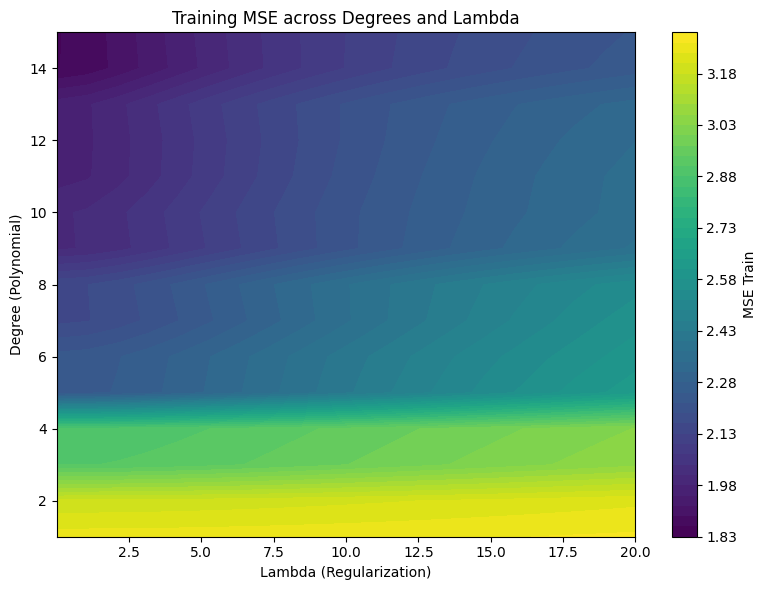

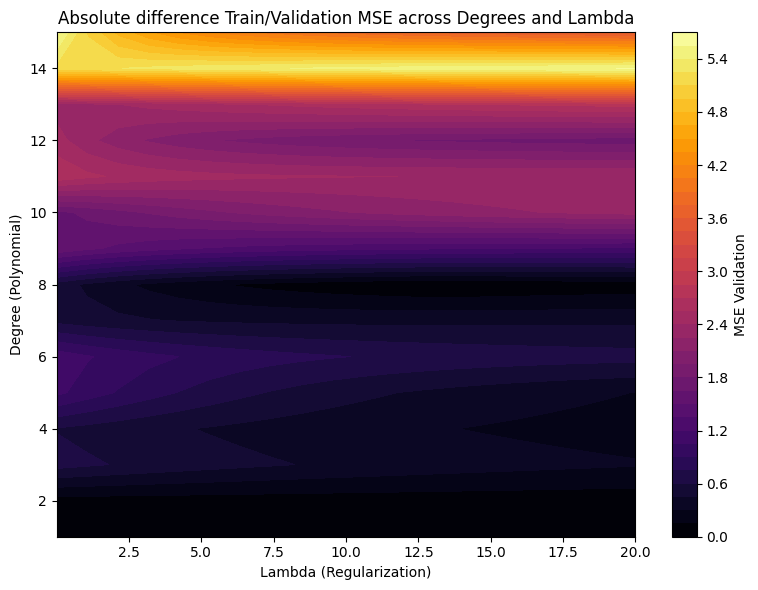

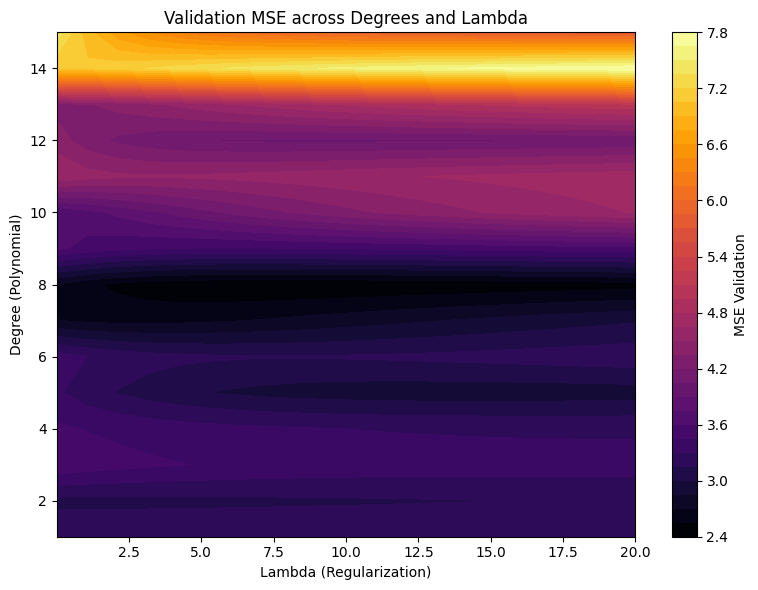

In [53]:
def get_mse_for_degree_lmbda(D, lmbda, X_train, X_valid, y_train, y_valid):
    polynomial_regression = RegularizedPolynomialRegression(D, lmbda)

    X_train_poly = polynomial_regression.make_poly(X_train)
    X_valid_poly = polynomial_regression.make_poly(X_valid)
    polynomial_regression.fit(X_train_poly, y_train)

    y_train_res = polynomial_regression.predict(X_train_poly)
    y_valid_res = polynomial_regression.predict(X_valid_poly)

    mse_train = mean_squared_error(y_train, y_train_res)
    mse_valid = mean_squared_error(y_valid, y_valid_res)

    return mse_train, mse_valid

# Grid Search on D and lmbda

D = 16
D_values = np.arange(1, D)
# lmbdas = np.logspace(1, -4, num=20)
lmbdas = np.linspace(0.01, 20, 20)

mse_train, mse_valid = [], []
for d in D_values:
    for lmbda in lmbdas:
        mse_train_new, mse_valid_new = get_mse_for_degree_lmbda(d, lmbda, X_train, X_valid, y_train, y_valid)
        mse_train.append(mse_train_new)
        mse_valid.append(mse_valid_new)

mse_train = np.array(mse_train).reshape(D-1, len(lmbdas))
mse_valid = np.array(mse_valid).reshape(D-1, len(lmbdas))

plt.figure(figsize=(8, 6))

# Training MSE contour plot
plt.contourf(lmbdas, D_values, mse_train, 50, cmap='viridis')
plt.colorbar(label='MSE Train')  # Add colorbar to indicate MSE values
plt.xlabel('Lambda (Regularization)')
plt.ylabel('Degree (Polynomial)')
plt.title('Training MSE across Degrees and Lambda')
plt.tight_layout()
plt.show()

# Absolute difference between Train and Validation MSE contour plot
plt.figure(figsize=(8, 6))
plt.contourf(lmbdas, D_values, np.abs(mse_train-mse_valid), 50, cmap='inferno')
plt.colorbar(label='MSE Validation')  # Add colorbar to indicate MSE values
plt.xlabel('Lambda (Regularization)')
plt.ylabel('Degree (Polynomial)')
plt.title('Absolute difference Train/Validation MSE across Degrees and Lambda')
plt.tight_layout()
plt.show()

# Validation MSE contour plot
plt.figure(figsize=(8, 6))
plt.contourf(lmbdas, D_values, mse_valid, 50, cmap='inferno')
plt.colorbar(label='MSE Validation')  # Add colorbar to indicate MSE values
plt.xlabel('Lambda (Regularization)')
plt.ylabel('Degree (Polynomial)')
plt.title('Validation MSE across Degrees and Lambda')
plt.tight_layout()
plt.show()

**Selection of a Model**

We aim to achieve the lowest possible area for the MSE during training while also minimizing the difference between training and validation MSE to prevent overfitting. 

So we choose D = 8 and lambda = 7.5.

(75, 9)


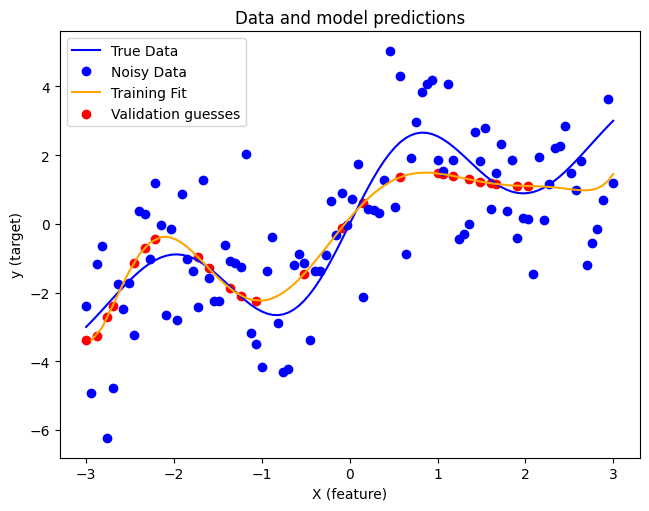

Model                                              Set        MSE       
-------------------------------------------------- ---------- ----------
Degree 8 Polynomial Regression without lambda      Training   2.1517    
Degree 8 Polynomial Regression without lambda      Validation 2.6835    
Degree 8 Polynomial Regression with lambda=7.5     Training   2.3094    
Degree 8 Polynomial Regression with lambda=7.5     Validation 2.4099    


In [54]:
D = 8
lmbda = 7.5
polynomial_regression = RegularizedPolynomialRegression(D, lmbda)

X_train_poly = polynomial_regression.make_poly(X_train)
X_valid_poly = polynomial_regression.make_poly(X_valid)
print(X_train_poly.shape)
polynomial_regression.fit(X_train_poly, y_train)

y_train_res = polynomial_regression.predict(X_train_poly)
y_valid_res = polynomial_regression.predict(X_valid_poly)

mse_train = mean_squared_error(y_train, y_train_res)
mse_valid = mean_squared_error(y_valid, y_valid_res)

plot_data_and_prediction(X_train, y_train_res, X_valid, y_valid_res)

degree_best_decay_mse_train = mean_squared_error(y_train, y_train_res)
degree_best_decay_mse_valid = mean_squared_error(y_valid, y_valid_res)

print(f"{'Model':<50} {'Set':<10} {'MSE':<10}")
print(f"{'-'*50:<50} {'-'*10:<10} {'-'*10:<10}")
print(f"{f'Degree {D} Polynomial Regression without lambda':<50} {'Training':<10} {degree_best_mse_train:<10.4f}")
print(f"{f'Degree {D} Polynomial Regression without lambda':<50} {'Validation':<10} {degree_best_mse_valid:<10.4f}")
print(f"{f'Degree {D} Polynomial Regression with lambda={lmbda}':<50} {'Training':<10} {degree_best_decay_mse_train:<10.4f}")
print(f"{f'Degree {D} Polynomial Regression with lambda={lmbda}':<50} {'Validation':<10} {degree_best_decay_mse_valid:<10.4f}")


The new model with weight decay is now performing better on the validation set (MSE = 2.4099) compared to the previous model without this regularization term (MSE = 2.6835).

**Studying the effect of the lambda regularization factor - Fixing the Hyperparameter $ D = 8 $**

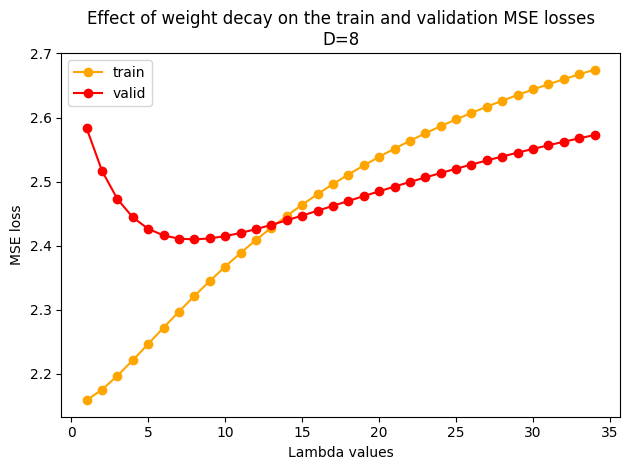

In [55]:
d = 8
lmbdas = np.arange(start=1,stop=35)

train_mse = []
valid_mse = []
for lmbda in lmbdas:
        mse_train_new, mse_valid_new = get_mse_for_degree_lmbda(d, lmbda, X_train, X_valid, y_train, y_valid)
        train_mse.append(mse_train_new)
        valid_mse.append(mse_valid_new)

plt.plot(lmbdas, train_mse, 'o-', label="train", color='orange')
plt.plot(lmbdas, valid_mse, 'o-', label="valid", color='red')
plt.title(f"Effect of weight decay on the train and validation MSE losses\nD={d}")
plt.xlabel("Lambda values")
plt.ylabel("MSE loss")
plt.tight_layout()
plt.legend()
plt.show()

Here is another visualization of the impact of the regularization term. As it increases, the model is penalized for fitting the training data too closely. There is a "sweet spot" for the regularization value, where the penalty doesn't excessively harm the model, allowing it to fit the data while generalizing well to unseen data. In this case, the optimal value of lambda for degree 8 seems to be around lambda=7, which is close to the value we selected on the contour plot earlier.

**Fixing the Hyperparameter $ lmbda = 7 $**

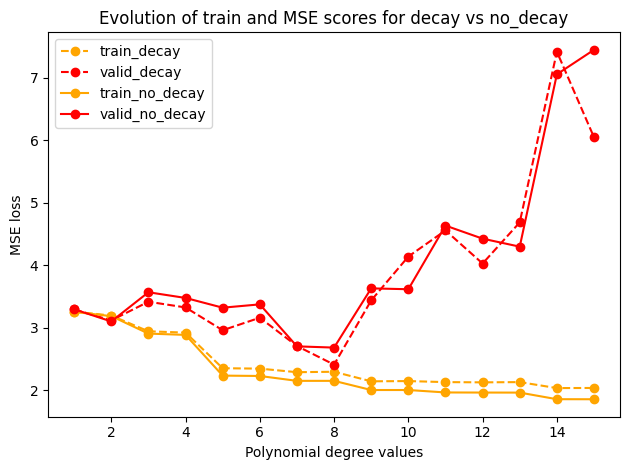

Mean difference between MSE_train with and without regularization: -11.61 %
Mean difference between MSE_valid with and without regularization: 12.84 %


In [56]:
def compare_two_methods(D, X_train, X_valid, y_train, y_valid, func1, func2, label1, label2, lmbda=None, lmbda_only_first=False):
    train_mse_1 = []
    valid_mse_1 = []
    for d in D:
        if lmbda is None:
            mse_train_new, mse_valid_new = func1(d, X_train, X_valid, y_train, y_valid)
        else:
            mse_train_new, mse_valid_new = func1(d, lmbda, X_train, X_valid, y_train, y_valid)
        train_mse_1.append(mse_train_new)
        valid_mse_1.append(mse_valid_new)

    train_mse_2 = []
    valid_mse_2 = []
    for d in D:
        if lmbda is None or lmbda_only_first:
            mse_train_new, mse_valid_new = func2(d, X_train, X_valid, y_train, y_valid)
        elif not lmbda_only_first:
            mse_train_new, mse_valid_new = func2(d, lmbda, X_train, X_valid, y_train, y_valid)
        train_mse_2.append(mse_train_new)
        valid_mse_2.append(mse_valid_new)

    plt.plot(D, train_mse_1, 'o--', label=f"train_{label1}", color='orange')
    plt.plot(D, valid_mse_1, 'o--', label=f"valid_{label1}", color='red')
    plt.plot(D, train_mse_2, 'o-', label=f"train_{label2}", color='orange')
    plt.plot(D, valid_mse_2, 'o-', label=f"valid_{label2}", color='red')
    plt.title(f"Evolution of train and MSE scores for {label1} vs {label2}")
    plt.xlabel("Polynomial degree values")
    plt.ylabel("MSE loss")
    plt.tight_layout()
    plt.legend()
    plt.show()

    return train_mse_1, valid_mse_1, train_mse_2, valid_mse_2

D = np.arange(start=1,stop=16)
lmbda = 7

train_mse, valid_mse, train_mse_decay, valid_mse_decay = compare_two_methods(D, X_train, X_valid, y_train, y_valid, get_mse_for_degree_lmbda, get_mse_for_degree, "decay", "no_decay", lmbda=lmbda, lmbda_only_first=True)

# Calculate mean difference between with and without regularization
train_mean_diff = np.mean(np.array(train_mse_decay) - np.array(train_mse))
valid_mean_diff = np.mean(np.array(valid_mse_decay) - np.array(valid_mse))

print(f"Mean difference between MSE_train with and without regularization: {train_mean_diff * 100:.2f} %")
print(f"Mean difference between MSE_valid with and without regularization: {valid_mean_diff * 100:.2f} %")

We can also visualize that, regardless of the model's degree, the regularization term always penalizes the model for fitting too closely to the training set, resulting in slightly lower accuracy on the training set (+12.8% on the MSE). However, this sometimes leads to positive impact on the validation dataset by improving its average accuracy (-11.6% on the MSE).

### 5. Comparison with `sklearn`

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

**(Question)** Use the `sklearn` classes imported above to apply polynomial regression on our toy dataset. Compare the results with your implementation and comment.

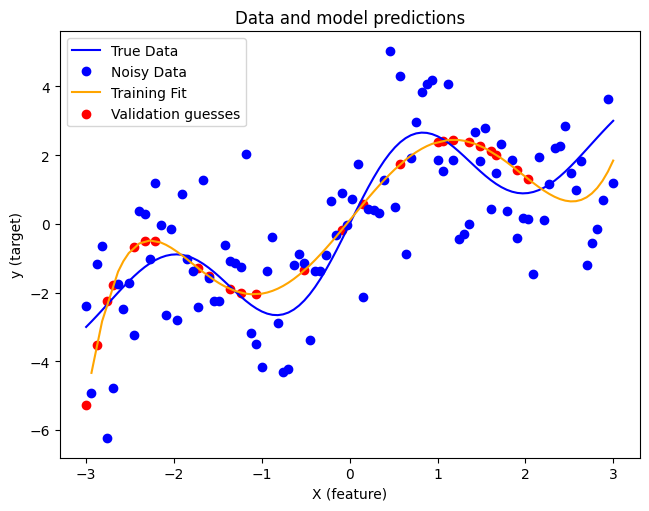

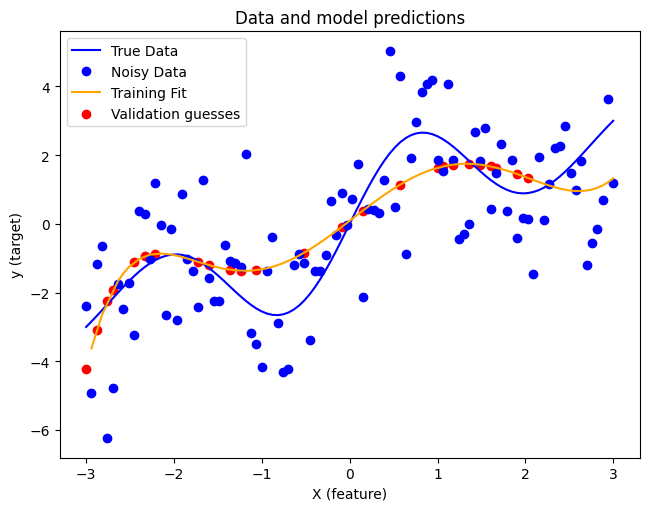

Model                                              Set        MSE       
-------------------------------------------------- ---------- ----------
Degree 6 Our Polynomial Regression without lambda  Training   2.1517    
Degree 6 Our Polynomial Regression without lambda  Validation 2.6835    
Degree 6 sklearn Polynomial Regression without lambda Training   2.2297    
Degree 6 sklearn Polynomial Regression without lambda Validation 3.3745    
Degree 6 Our Polynomial Regression with lambda=7   Training   2.4292    
Degree 6 Our Polynomial Regression with lambda=7   Validation 3.0042    


In [58]:
# Polynomial regression using sklearn (without regularization)
D = 6
poly = PolynomialFeatures(D, interaction_only=False, include_bias=True, order='C')
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_valid_poly = poly.transform(X_valid.reshape(-1, 1))

# Fit the model using LinearRegression
lin_reg = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lin_reg.fit(X_train_poly, y_train)

# Predict using the fitted model
y_train_pred = lin_reg.predict(X_train_poly)
y_valid_pred = lin_reg.predict(X_valid_poly)

plot_data_and_prediction(X_train, y_train_pred, X_valid, y_valid_pred)

sklearn_degree_best_mse_train = mean_squared_error(y_train, y_train_pred)
sklearn_degree_best_mse_valid = mean_squared_error(y_valid, y_valid_pred)


# Fit the model using LinearRegression
lin_reg = Ridge(
    alpha=6,         # Weight decay value
    fit_intercept=True,  # Allow the model o calculate the intercept (bias term)
    solver="svd"         # The weight matrix has to be factorized using SVD factorization
    )
lin_reg.fit(X_train_poly, y_train)

# Predict using the fitted model
y_train_pred = lin_reg.predict(X_train_poly)
y_valid_pred = lin_reg.predict(X_valid_poly)

plot_data_and_prediction(X_train, y_train_pred, X_valid, y_valid_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)


print(f"{'Model':<50} {'Set':<10} {'MSE':<10}")
print(f"{'-'*50:<50} {'-'*10:<10} {'-'*10:<10}")
print(f"{f'Degree {D} Our Polynomial Regression without lambda':<50} {'Training':<10} {degree_best_mse_train:<10.4f}")
print(f"{f'Degree {D} Our Polynomial Regression without lambda':<50} {'Validation':<10} {degree_best_mse_valid:<10.4f}")
print(f"{f'Degree {D} sklearn Polynomial Regression without lambda':<50} {'Training':<10} {sklearn_degree_best_mse_train:<10.4f}")
print(f"{f'Degree {D} sklearn Polynomial Regression without lambda':<50} {'Validation':<10} {sklearn_degree_best_mse_valid:<10.4f}")
print(f"{f'Degree {D} Our Polynomial Regression with lambda={lmbda}':<50} {'Training':<10} {mse_train:<10.4f}")
print(f"{f'Degree {D} Our Polynomial Regression with lambda={lmbda}':<50} {'Validation':<10} {mse_valid:<10.4f}")

The results of the scikit-learn models appear to be identical to those of the model with a degree of 8. A more detailed study will follow in the section below.

In [73]:
from sklearn.model_selection import KFold, GroupKFold, cross_val_score

def get_cross_val_score(classifier_class, kwargs, X, y, kf):
    train_accuracies = []
    test_accuracies = []

    for train_index, val_index in kf.split(X, y):
        classifier = classifier_class(**kwargs)

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        classifier.fit(X_train, y_train)

        y_train_pred = classifier.predict(X_train)
        y_val_pred = classifier.predict(X_val)

        train_accuracy = np.mean((y_train_pred - y_train)**2)
        test_accuracy = np.mean((y_val_pred - y_val)**2)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return train_accuracies, test_accuracies


kf = KFold(n_splits=10, shuffle=False)

train_acc, test_acc = get_cross_val_score(LinearRegression, {'fit_intercept':True, 'copy_X':True, 'n_jobs':None, 'positive':False}, X_train_poly, y_train, kf)

print(f"Train accuracy: {np.mean(train_acc)}")
print(f"Test accuracy: {np.mean(test_acc)}")

train_acc, test_acc = get_cross_val_score(Ridge, {'alpha':4, 'fit_intercept':True, 'copy_X':True}, X_train_poly, y_train, kf)

print(f"Train accuracy: {np.mean(train_acc)}")
print(f"Test accuracy: {np.mean(test_acc)}")



Train accuracy: 2.204243899604342
Test accuracy: 2.7493583891961224
Train accuracy: 2.3399793405267344
Test accuracy: 2.888794804442908


In [78]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

D = 6
poly = PolynomialFeatures(D, interaction_only=False, include_bias=True, order='C')
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
X_valid_poly = poly.transform(X_valid.reshape(-1, 1))


grid_search_params = {
    'alpha': [1,2,3,4,5,6,7,8,9,10]
}
param1_size = len(grid_search_params['alpha'])


classifier = Ridge()
grid_search = GridSearchCV(classifier, grid_search_params, cv=kf)
grid_search.fit(X_train_poly, y_train)

# Plotting the results of the grid search
scores = grid_search.cv_results_['mean_test_score'].reshape(param1_size).T

print(scores)

# fig, ax = plt.subplots(figsize=(8, 6))
# cax = ax.imshow(scores, cmap='viridis', aspect='auto')
# fig.colorbar(cax)
# ax.set_xticks(np.arange(param1_size))
# ax.set_xticklabels(grid_search_params['C'])
# ax.set_yticklabels(grid_search_params['kernel'])
# plt.xticks(rotation=45)

# for j in range(param1_size):
#     ax.text(j,  f'{scores[ j]:.3f}', ha='center', va='center', color='black')
# ax.set_xlabel('C (Soft margin parameter)')
# ax.set_ylabel('kernel')
# ax.set_title('Grid Search Results: Mean Test Scores')
# plt.tight_layout()
# plt.show()

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

[0.22865855 0.23273254 0.23147382 0.22719087 0.22122254 0.21436635
 0.20710566 0.19973602 0.19243785 0.1853197 ]
Best parameters: {'alpha': 2}
Best score: 0.2327325402245398


#### In-depth Comparison with scikit-learn Models

In this section, we compare our models with scikit-learn's models, both with and without weight decay.

In [60]:
# Preparing functions to use in graph generation below

def get_mse_for_degree_sklearn(D, X_train, X_valid, y_train, y_valid):
    poly = PolynomialFeatures(D)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_valid_poly = poly.transform(X_valid.reshape(-1, 1))
    
    # Fit the model using LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)

    # Predict using the fitted model
    y_train_pred = lin_reg.predict(X_train_poly)
    y_valid_pred = lin_reg.predict(X_valid_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)

    return mse_train, mse_valid

def get_mse_for_degree_lambda_sklearn(D, lmdba, X_train, X_valid, y_train, y_valid):
    poly = PolynomialFeatures(D)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_valid_poly = poly.transform(X_valid.reshape(-1, 1))
    
    # Fit the model using LinearRegression
    lin_reg = Ridge(
        alpha=lmdba,         # Weight decay value
        fit_intercept=True,  # Allow the model o calculate the intercept (bias term)
        solver="svd"         # The weight matrix has to be factorized using SVD factorization
        )
    lin_reg.fit(X_train_poly, y_train)

    # Predict using the fitted model
    y_train_pred = lin_reg.predict(X_train_poly)
    y_valid_pred = lin_reg.predict(X_valid_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_valid = mean_squared_error(y_valid, y_valid_pred)

    return mse_train, mse_valid

##### Comparing Our Linear Regression Implementation Without Weight Decay with the scikit-learn Implementation

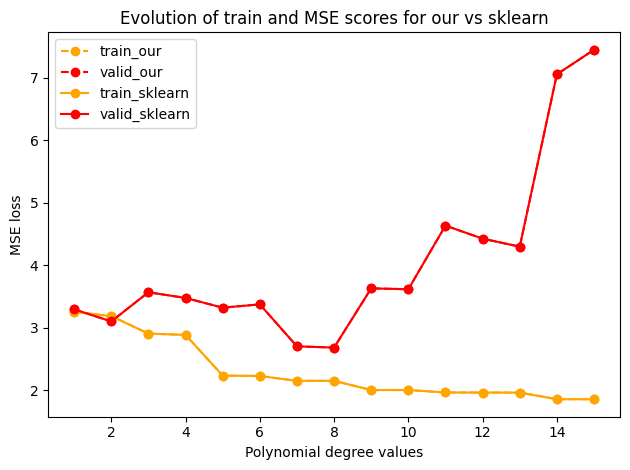

In [61]:
D = np.arange(start=1,stop=16)

_ = compare_two_methods(D, X_train, X_valid, y_train, y_valid, get_mse_for_degree, get_mse_for_degree_sklearn, "our", "sklearn")

By comparing the training and validation losses for our model and scikit-learn's model, there is no visual difference, indicating that the polynomial regression computations we set up are quite similar to those of scikit-learn. This helped us understand that there is no hidden secret behind linear regression models, while also allowing us to gain a deeper understanding of linear regression.

##### Comparing Our Linear Regression Implementation with Weight Decay (Ridge Regression) with the scikit-learn Implementation

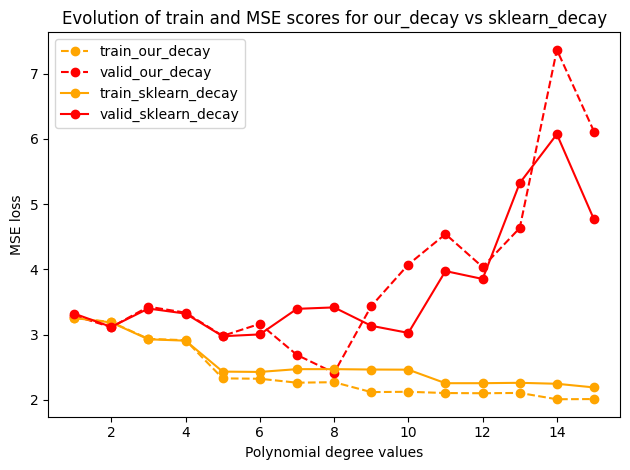

In [62]:
D = np.arange(start=1,stop=16)
lmbda = 6

_ = compare_two_methods(D, X_train, X_valid, y_train, y_valid, get_mse_for_degree_lmbda, get_mse_for_degree_lambda_sklearn, "our_decay", "sklearn_decay", lmbda)

Although our model's weight decay behaves as intended, it does not produce the same loss curve as the one generated by scikit-learn's Ridge regression model. We believe this difference is due to the fact that scikit-learn uses sparse matrix optimizations. In other words, sparse matrices can be factorized into a dot product of multiple matrices, which helps simplify the computations. We were unable to disable the factorization option, so we cannot conclude whether there is an additional technique used by scikit-learn's Ridge regression.

To verify the effect of weight decay on the linear regression model in the case of scikit-learn's implementation, we plotted the following figure.

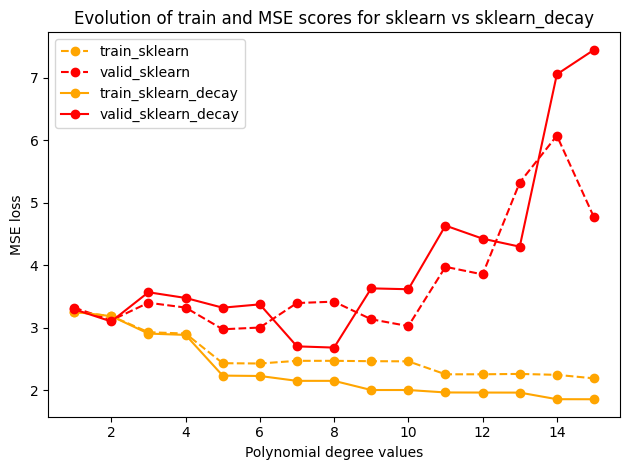

In [63]:
D = np.arange(start=1,stop=16)
lmbda = 6

_ = compare_two_methods(D, X_train, X_valid, y_train, y_valid, get_mse_for_degree_lambda_sklearn, get_mse_for_degree_sklearn, "sklearn", "sklearn_decay", lmbda, True)


The figure above is very similar to the last figure in Section 4, which is expected, as it shows that the scikit-learn Ridge regression model effectively reduces the gap between the training and validation losses, thus correctly decreasing the risk of overfitting (i.e., preventing the training MSE loss from getting too close to zero).